# Activity 14.01 – analyzing air quality data

1. Which day of the week has the highest NO2(GT) emissions?
2. At what time of the day are NMHC(GT) emissions highest?
3. Which month has the lowest CO(GT) emissions?

In [1]:
!wget https://raw.githubusercontent.com/PacktWorkshops/The-Pandas-Workshop/master/Chapter14/Datasets/AirQualityUCI.csv

--2023-07-10 00:18:03--  https://raw.githubusercontent.com/PacktWorkshops/The-Pandas-Workshop/master/Chapter14/Datasets/AirQualityUCI.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 775593 (757K) [text/plain]
Saving to: ‘AirQualityUCI.csv’

AirQualityUCI.csv   100%[===================>] 757.42K  --.-KB/s    in 0.03s   

2023-07-10 00:18:03 (21.9 MB/s) - ‘AirQualityUCI.csv’ saved [775593/775593]



In [2]:
import pandas as pd

In [3]:
air_qual = pd.read_csv('AirQualityUCI.csv', delimiter = ';')

In [4]:
air_qual.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
air_qual.shape

(9471, 17)

In [6]:
# air_qual.dropna(axis = 0, inplace = True)

# air_qual = air_qual.drop(['Unamed: 15', 'Unamed: 16'], axis = 1)
# air_qual.head()

air_qual = air_qual.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
air_qual.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
air_qual.shape

(9471, 15)

In [8]:
air_qual

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Drop unknown columns and rows with NA values.

In [9]:
air_qual = air_qual.dropna()
air_qual.shape

(9357, 15)

In [10]:
air_qual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


4. Extract the different attributes from the date column.

In [11]:
from dateutil.parser import parse

air_qual['Parse_date'] = air_qual['Date'].apply(lambda x: parse(x))
air_qual['Weekday'] = air_qual['Parse_date'].apply(lambda x: x.weekday())
air_qual['Day'] = air_qual['Parse_date'].apply(lambda x: x.strftime('%A'))
air_qual['Month'] = air_qual['Parse_date'].apply(lambda x: x.strftime('%B'))

air_qual.head()

<ipython-input-11-66e0cc8f92e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_qual['Parse_date'] = air_qual['Date'].apply(lambda x: parse(x))
<ipython-input-11-66e0cc8f92e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_qual['Weekday'] = air_qual['Parse_date'].apply(lambda x: x.weekday())
<ipython-input-11-66e0cc8f92e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Parse_date,Weekday,Day,Month
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-10-03,6,Sunday,October
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-10-03,6,Sunday,October
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-10-03,6,Sunday,October
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-10-03,6,Sunday,October
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-10-03,6,Sunday,October


Question 1 : Which day of the week has the highest NO2(GT) emissions

In [12]:
# group records by date aand NO2(GT), then find the average value of emissions for each day of the week

Q1 = pd.DataFrame(air_qual.groupby(['Day'])['NO2(GT)'].agg('mean'))
Q1

,NO2(GT)
Day,
Friday,70.924851
Monday,65.771155
Saturday,58.110340
Sunday,50.844978
Thursday,52.760417
Tuesday,48.289394
Wednesday,60.279545


Text(0, 0.5, 'Avg Emissions')

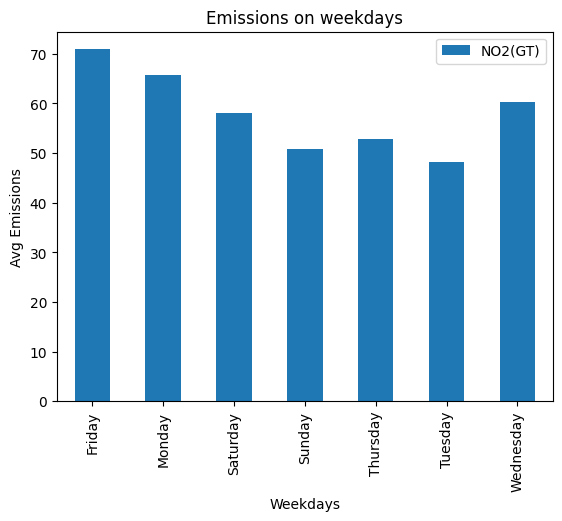

In [13]:
Q1_plot = Q1.plot.bar(
    y = 'NO2(GT)',
    title = 'Emissions on weekdays'
)

Q1_plot.set_xlabel("Weekdays")
Q1_plot.set_ylabel("Avg Emissions")

Question 2 : Which time of the day is NHMC(GT) emissions highest

In [14]:
# again, grouping by time and NHMC(GT) first to see

Q2 = pd.DataFrame(air_qual.groupby(['Time'])['NMHC(GT)'].agg('mean'))

<Axes: title={'center': 'Emission at hours of day'}, xlabel='Average Emissions', ylabel='Hours'>

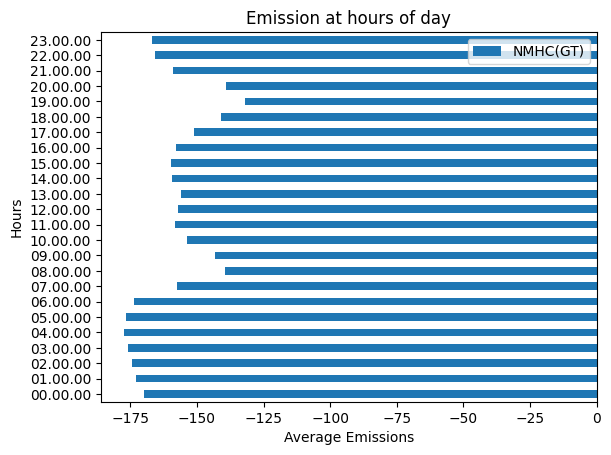

In [15]:
Q2_plot = Q2.plot.barh(
    y = 'NMHC(GT)',
    title = 'Emission at hours of day'
)

Q2_plot.set_xlabel("Average Emissions")
Q2_plot.set_ylabel("Hours")

Q2_plot

Question 3 : Which month are the CO(GT) emissions highest

In [16]:
# cleaning function

def cleanFeat(x): return pd.to_numeric(".".join(x.split(',')))

In [17]:
# cleaning up CO format

air_qual['CO(GT)'] = air_qual['CO(GT)'].apply(lambda x: cleanFeat(x))
air_qual.head()

<ipython-input-17-a791f15155a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_qual['CO(GT)'] = air_qual['CO(GT)'].apply(lambda x: cleanFeat(x))


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Parse_date,Weekday,Day,Month
0,10/03/2004,18.00.00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-10-03,6,Sunday,October
1,10/03/2004,19.00.00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-10-03,6,Sunday,October
2,10/03/2004,20.00.00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-10-03,6,Sunday,October
3,10/03/2004,21.00.00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-10-03,6,Sunday,October
4,10/03/2004,22.00.00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-10-03,6,Sunday,October


In [18]:
# another little groupby aggregate combo

Q3 = pd.DataFrame(air_qual.groupby(['Month'])['CO(GT)'].agg('mean'))
Q3

,CO(GT)
Month,
April,-72.784898
August,-61.484274
December,-37.215495
February,-18.839943
January,-17.982552
July,-53.468952
June,-9.092500
March,-19.758170
May,-38.836290


Text(0, 0.5, 'Months')

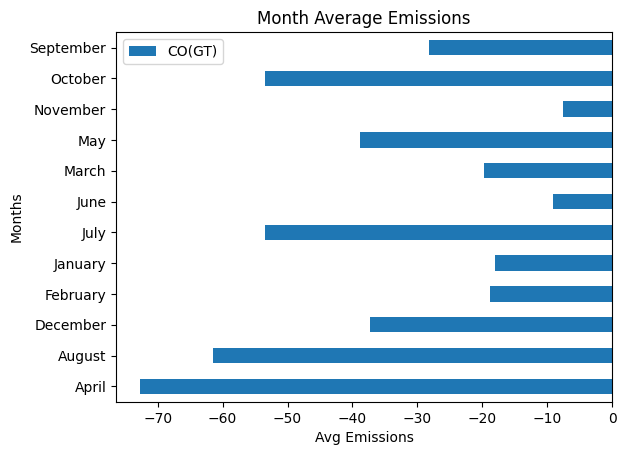

In [19]:
Q3_plot = Q3.plot.barh(
    y = 'CO(GT)',
    title = 'Month Average Emissions'
)

Q3_plot.set_xlabel("Avg Emissions")
Q3_plot.set_ylabel("Months")